In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [2]:
# Loading the dataset and perform splitting
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print("Training Set:   {} samples".format(len(x_train)))
print("Test Set:       {} samples".format(len(x_test)))

Training Set:   60000 samples
Test Set:       10000 samples


In [4]:
x_train.shape

(60000, 28, 28)

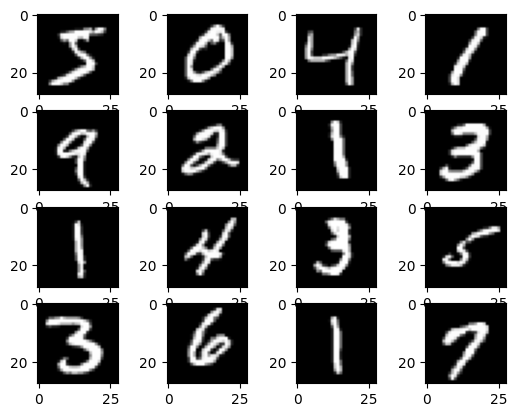

In [10]:
import matplotlib.pyplot as plt

for i in range(16):
    plt.subplot(4,4, i+1)
    plt.imshow(x_train[i, :, :], cmap='gray')

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
import numpy as np
# Pad images with 0s
# Transform 28x28 images into 32x32 images (by adding padding) that LeNet can process
x_train      = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test       = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [15]:
print("Updated Image Shape1: {}".format(x_train.shape))
print("Updated Image Shape2: {}".format(x_train[0].shape))

Updated Image Shape1: (60000, 32, 32, 1)
Updated Image Shape2: (32, 32, 1)


In [16]:
print(y_train)

[5 0 4 ... 5 6 8]


In [17]:
x_train[0].shape

(32, 32, 1)

In [18]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [19]:
# Building the Model Architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 29s 59ms/step - loss: 0.3043 - accuracy: 0.9113 - val_loss: 0.0867 - val_accuracy: 0.9723
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0770 - accuracy: 0.9763 - val_loss: 0.0467 - val_accuracy: 0.9850
Epoch 3/20
469/469 [==============================] - 28s 60ms/step - loss: 0.0562 - accuracy: 0.9821 - val_loss: 0.0471 - val_accuracy: 0.9854
Epoch 4/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.0388 - val_accuracy: 0.9869
Epoch 5/20
469/469 [==============================] - 27s 58ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 6/20
469/469 [==============================] - 27s 57ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0339 - val_accuracy: 0.9901
Epoch 7/20
469/469 [==============================] - 28s 59ms/step - loss: 0.0257 - accuracy: 0.9919 - val_loss: 0.0305 - val_accuracy:

In [22]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0432 - accuracy: 0.9898
Test Loss: 0.04317735508084297
Test accuracy: 0.989799976348877


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

1/1 [==============================] - 0s 38ms/step
8


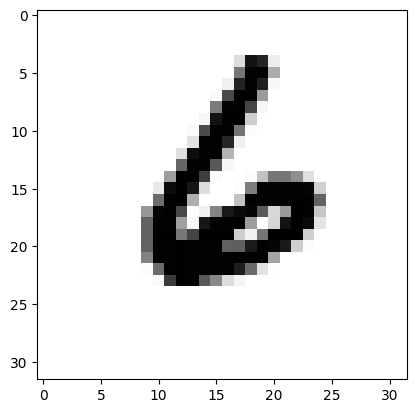

In [43]:
# Plot the Image
image_index = 8888
plt.imshow(x_test[image_index].reshape(32, 32), cmap='Greys')

# Make Prediction
pred = model.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())

1/1 [==============================] - 0s 61ms/step
8


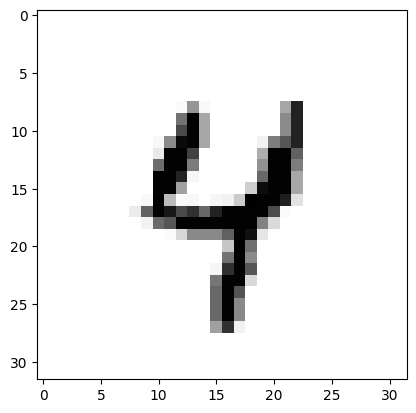

In [44]:
# Plot the Image
image_index = 1111
plt.imshow(x_test[image_index].reshape(32, 32), cmap='Greys')

# Make Prediction
pred = model.predict(x_test[image_index].reshape(1, rows, cols, 1 ))
print(pred.argmax())